# Group 2 Final Project Technical Notebook

Name(s): Dominic Fanucchi, Bilal Najar, Carlo Sanchez  
Date:    September 29, 2023

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KernelDensity
import seaborn as sns
import random
from scipy.stats import norm, dgamma, geom, t

# grab local dataset
import os

# Style sheet to use with Matplotlib and Seaborn plots
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)



In [127]:
#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 

# os.chdir('../project/mushroom/')
# df = pd.read_csv('agaricus-lepiota.data')
# df = pd.read_csv(r'C:\\Users\\HomeBase\\Desktop\\USD\\AAI-500\\project\\mushroom\\agaricus-lepiota.data')
# df.head()

# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
# print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 

                        name     role         type demographic  \
0                  poisonous   Target  Categorical        None   
1                  cap-shape  Feature  Categorical        None   
2                cap-surface  Feature  Categorical        None   
3                  cap-color  Feature       Binary        None   
4                    bruises  Feature  Categorical        None   
5                       odor  Feature  Categorical        None   
6            gill-attachment  Feature  Categorical        None   
7               gill-spacing  Feature  Categorical        None   
8                  gill-size  Feature  Categorical        None   
9                 gill-color  Feature  Categorical        None   
10               stalk-shape  Feature  Categorical        None   
11                stalk-root  Feature  Categorical        None   
12  stalk-surface-above-ring  Feature  Categorical        None   
13  stalk-surface-below-ring  Feature  Categorical        None   
14    stal

In [128]:
#set the data into a single dataframe
mushroom_df = X.join(y, lsuffix='X', rsuffix='y')
# print(mushroom_df.describe()) # --> 8124r x 23c
# print(mushroom_df.head())

#get columns of the dataset
columns = list(mushroom_df.columns)
''' Column names for quick reference
'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 
'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
'spore-print-color', 'population', 'habitat', 'poisonous'
'''
# print(columns)



#examining possible missing values
# print("Missing values distribution: ")
# print(mushroom_df.isnull().mean())
# mushroom_df=mushroom_df.dropna()
# print("")

#there is missing data from the stalk-root column
# print(mushroom_df.isnull().mean())

# print(mushroom_df['stalk-root'])
# print(mushroom_df)

" Column names for quick reference\n'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',\n'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', \n'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',\n'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',\n'spore-print-color', 'population', 'habitat', 'poisonous'\n"

In [129]:
# checking column types in case any need to be changed
# mushroom_df.dtypes # --> they are all dtype:object

In [130]:
# TODO: change 1 character data to expanded names for entire dataset --> use replacement dicts for columns that share a common letter

""" 
# define replacement dictionaries for each column
replacement_dictionary = {
    'cap-shape': {}, 
    'cap-surface': {}, 
    'cap-color': {}, 
    'bruises': {}, 
    'odor': {}, 
    'gill-attachment': {},
    'gill-spacing': {}, 
    'gill-size': {}, 
    'gill-color': {}, 
    'stalk-shape': {}, 
    'stalk-root': {}, 
    'stalk-surface-above-ring': {}, 
    'stalk-surface-below-ring': {}, 
    'stalk-color-above-ring': {},
    'stalk-color-below-ring': {}, 
    'veil-type': {}, 
    'veil-color': {}, 
    'ring-number': {}, 
    'ring-type': {},
    'spore-print-color': {}, 
    'population': {}, 
    'habitat': {}, 
    'poisonous': {}
}

# loop through the colums and apply replacements
for column, replacement in replacement_dictionary.items():
    mushroom_df[column] = mushroom_df[column].replace(replacement)
"""

poisonous_replacement = {'p':'poisonous', 'e':'edible'}
mushroom_df['poisonous'] = mushroom_df['poisonous'].replace(poisonous_replacement)

In [131]:
mushroom_df = mushroom_df.copy() # --> important to use to let pandas know that youre now referring to a new dataset and not referencing the previous
print(mushroom_df)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
0               c         n          k           e          e   
1               c         b          k   

In [132]:
# listing total number of null values for each column
mushroom_df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [133]:
# checking for duplicated data --> 0
mushroom_df.loc[mushroom_df.duplicated()]
# mushroom_df.loc[mushroom_df.duplicated(subset=['cap-shape'])].head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous


In [134]:
# feature understanding -- univariate analysis

# loop through the columns and print value_counts()
for column in mushroom_df.columns:
    counts = mushroom_df[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(counts)
    print()

Value counts for column 'cap-shape':
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

Value counts for column 'cap-surface':
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

Value counts for column 'cap-color':
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

Value counts for column 'bruises':
bruises
f    4748
t    3376
Name: count, dtype: int64

Value counts for column 'odor':
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

Value counts for column 'gill-attachment':
gill-attachment
f    7914
a     210
Name: count, dtype: int64

Value counts for column 'gill-spacing':
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

Value counts for column 'gill-size':
gill-size
b    5612
n    2512
Name: count, dtype: int64

Value counts for column 'gill-

Text(0, 0.5, 'Count')

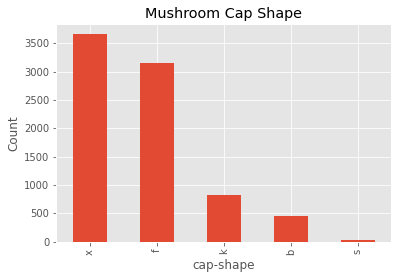

In [135]:
# plot 1 feature
ax = mushroom_df['cap-shape'].value_counts().head().plot(kind='bar', title='Mushroom Cap Shape')
ax.set_xlabel('cap-shape')
ax.set_ylabel('Count')

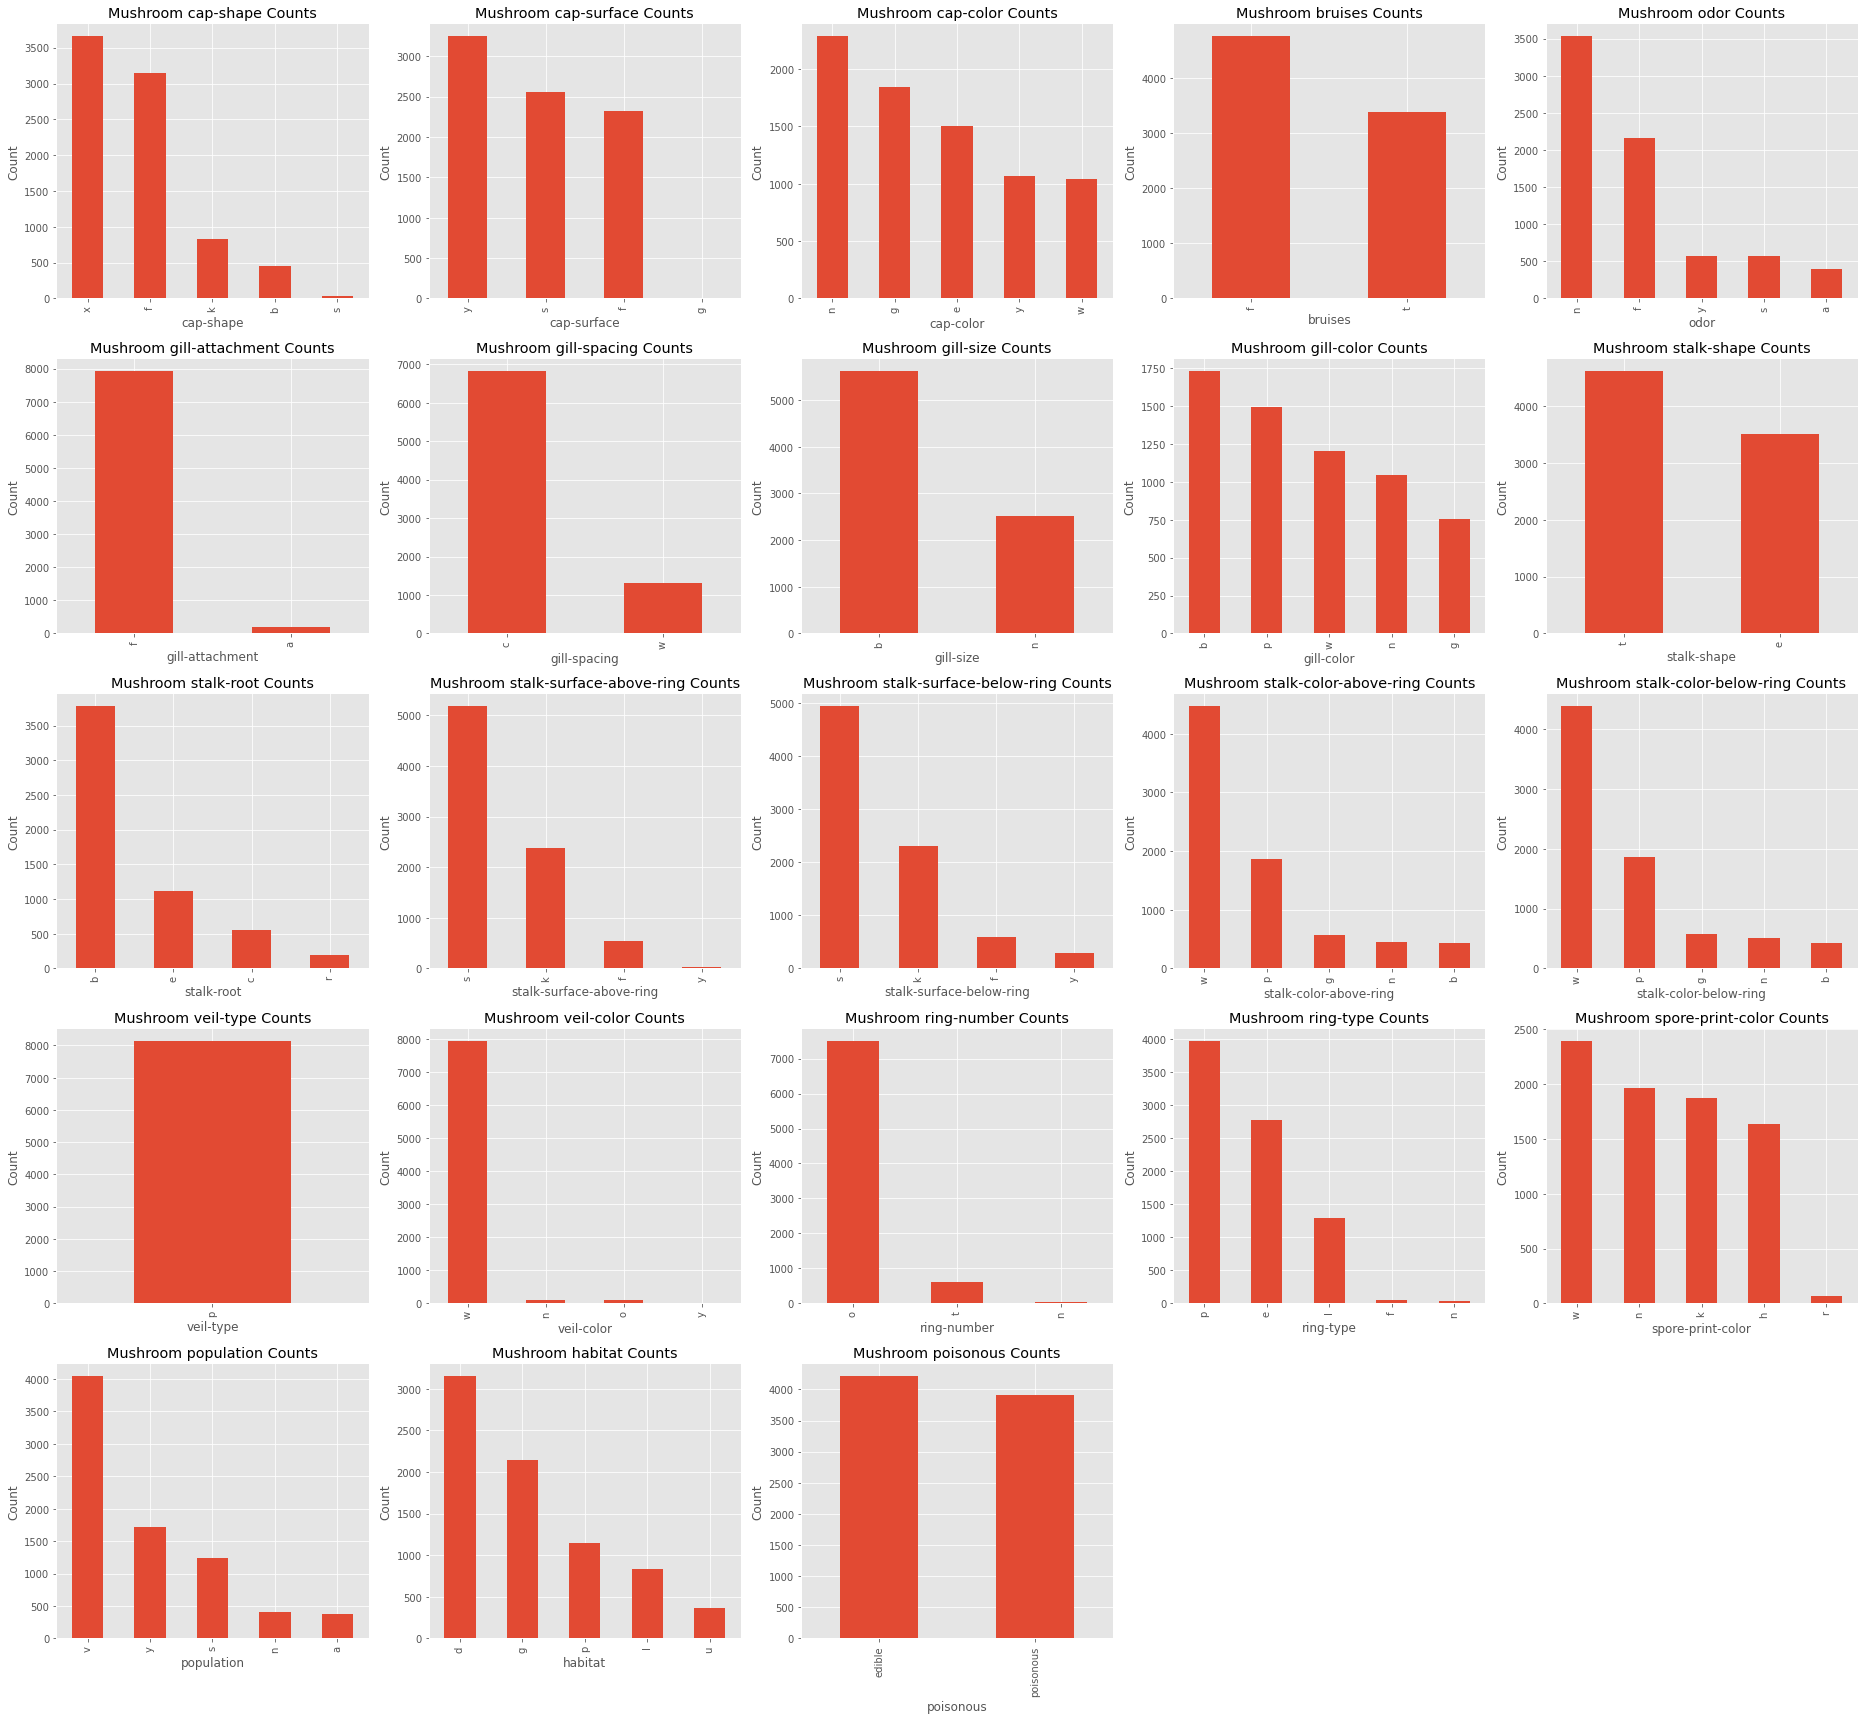

In [136]:
# calculate the number of rows and columns for subplots
n_rows = 5
n_cols = len(mushroom_df.columns) // n_rows + 1

# create a single figure and subplots with specified rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(26, 24))

# flatten the axes array for iteration
axes = axes.flatten()

# loop through the columns and plot them on separate subplots
for i, column in enumerate(mushroom_df.columns):
    counts = mushroom_df[column].value_counts().head()
    
    # create a bar plot on the current subplot
    ax = counts.plot(kind='bar', ax=axes[i])
    
    # set the title, xlabel, and ylabel
    ax.set_title(f'Mushroom {column} Counts')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# remove any unused subplots
for i in range(len(mushroom_df.columns), len(axes)):
    fig.delaxes(axes[i])

# adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [137]:
# TODO: plot histogram for continuos variable feature types

<Figure size 1440x864 with 0 Axes>

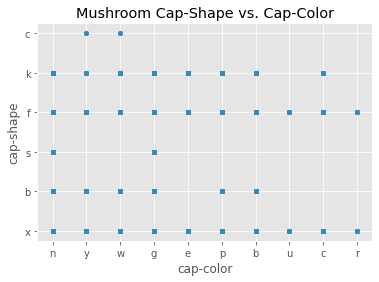

In [159]:
# feature relationships

# create the scatter plot
plt.figure(figsize=(20,12))
mushroom_df.plot(kind='scatter', y='cap-shape', x='cap-color', title='Mushroom Cap-Shape vs. Cap-Color')
plt.show()

c:\Users\HomeBase\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomeBase\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomeBase\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomeBase\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

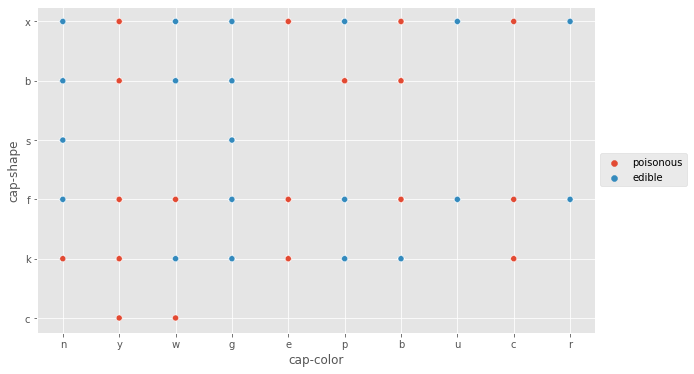

In [162]:
# using seaborn, the plot shows the same data as above but the poisonous value colors the data points
plt.figure(figsize=(10,6))
sns.scatterplot(y='cap-shape', x='cap-color', hue='poisonous', data=mushroom_df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

c:\Users\HomeBase\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomeBase\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomeBase\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomeBase\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

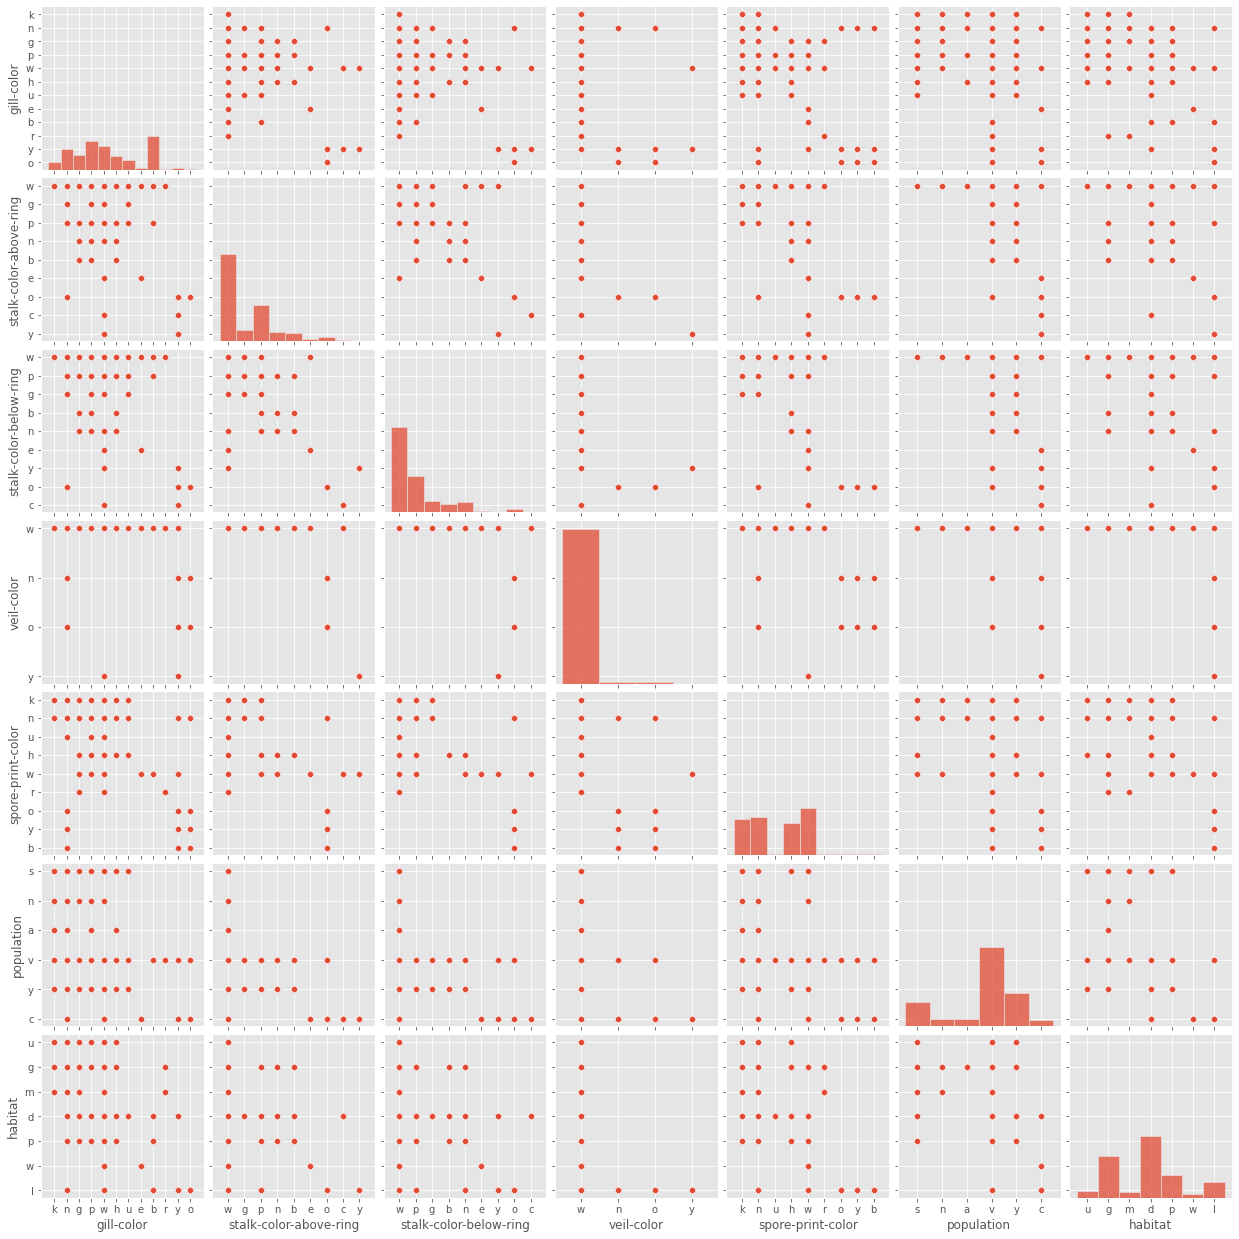

In [170]:
# TODO: pick better features to compare with instead of just all
# sns.pairplot(mushroom_df, vars=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
# 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 
# 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
# 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
# 'spore-print-color', 'population', 'habitat', 'poisonous'])

# hue cant be applied to this pairplot because we do not have 'numeric' or 'datatime' data
sns.pairplot(mushroom_df, 
             vars=[ 'gill-color', 'stalk-color-above-ring',
                    'stalk-color-below-ring', 'veil-color', 
                    'spore-print-color', 'population', 'habitat'], 
            )
plt.show()

In [172]:
# correllation --> need numeric dtypes
# sns.heatmap() 

# TODO: continue looking into more EDA for 'object' types to maybe glean some useful information

Ask Questions about our Dataset